In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [18]:
inp = layers.Input((28,28,1))
x = layers.Conv2D(32,3,activation='relu',padding='same')(inp)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32,3,activation='relu',padding='same')(x)
x = layers.UpSampling2D(2)(x)
out = layers.Conv2D(1,3,activation='sigmoid',padding='same')(x)
model = models.Model(inp, out)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [19]:
h = model.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - loss: 0.2610 - val_loss: 0.0847
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - loss: 0.0813 - val_loss: 0.0770
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - loss: 0.0756 - val_loss: 0.0736
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - loss: 0.0733 - val_loss: 0.0718
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - loss: 0.0715 - val_loss: 0.0699


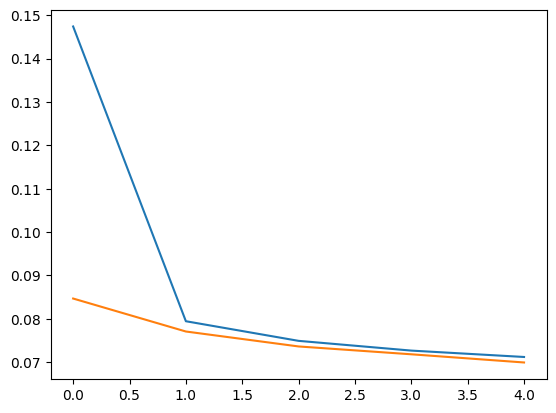

In [21]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


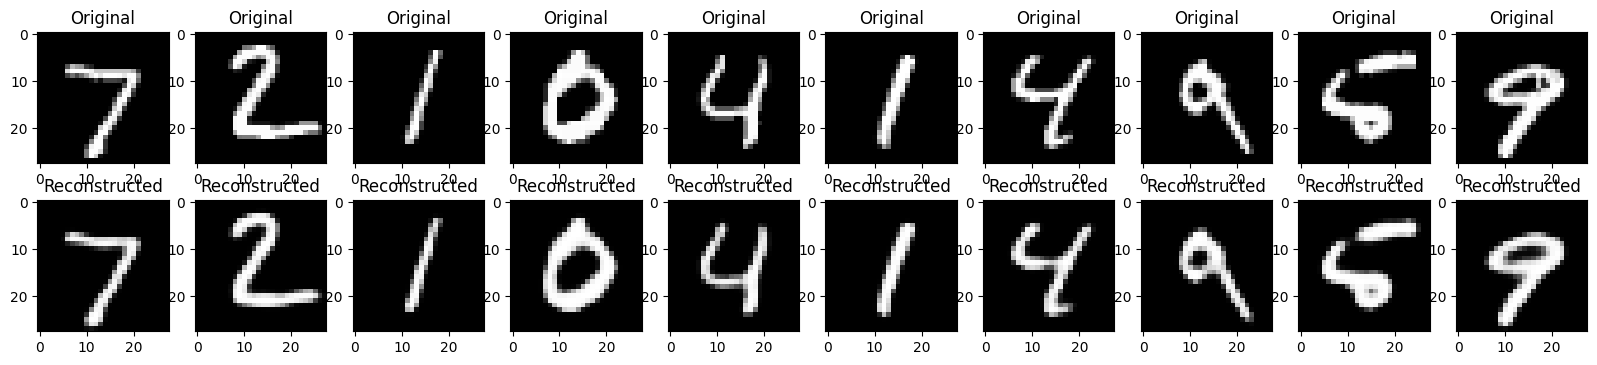

In [12]:
decoded = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title('Original')
    plt.subplot(2,10,10+i+1)
    plt.imshow(decoded[i].squeeze(), cmap='gray')
    plt.title('Reconstructed')
plt.show()
